In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
df_train = pd.read_csv('./project_4/Cleaned/train.csv')
df_train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,4.0,Good,809.98,26.822620,265.0,No,49.574949,High_spent_Small_value_payments,312.494089,Good
1,3392,2,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,4.0,Good,809.98,31.944960,266.0,No,49.574949,Low_spent_Large_value_payments,284.629162,Good
2,3392,3,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,4.0,Good,809.98,28.609352,267.0,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,3392,4,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,4.0,Good,809.98,31.377862,268.0,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
4,3392,5,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,4.0,Good,809.98,24.797347,269.0,No,49.574949,High_spent_Medium_value_payments,341.489231,Good


In [3]:
df_test = pd.read_csv('./project_4/Cleaned/test.csv')
df_test.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,3392,9,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,11.27,4.0,Good,809.98,35.030402,273.0,No,49.574949,Low_spent_Small_value_payments,186.266702
1,3392,10,24.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,13.27,4.0,Good,809.98,33.053114,274.0,No,49.574949,High_spent_Medium_value_payments,361.444004
2,3392,11,24.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,12.27,4.0,Good,809.98,33.811894,275.0,No,49.574949,Low_spent_Medium_value_payments,264.675446
3,3392,12,24.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,11.27,4.0,Good,809.98,32.430559,276.0,No,49.574949,High_spent_Medium_value_payments,343.826873
4,8625,9,28.0,Teacher,34847.84,3037.986667,4.0,6.0,1.0,credit-builder loan,...,5.42,5.0,Good,605.03,25.926822,327.0,No,18.816215,High_spent_Large_value_payments,485.298434


In [4]:
df_train.drop("Customer_ID", axis=1, inplace=True)

In [5]:
df_train.drop("Type_of_Loan", axis=1, inplace=True)
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,High_spent_Medium_value_payments,341.489231,Good


In [6]:
df_test.drop("Customer_ID", axis=1, inplace=True)

In [7]:
df_test.drop("Type_of_Loan", axis=1, inplace=True)

In [8]:
y = df_train['Credit_Score']
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Credit_Score, dtype: object

In [9]:
df_train.drop("Credit_Score", axis=1, inplace=True)
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,1,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,High_spent_Small_value_payments,312.494089
1,2,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,Low_spent_Large_value_payments,284.629162
2,3,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,Low_spent_Medium_value_payments,331.209863
3,4,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,Low_spent_Small_value_payments,223.451310
4,5,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,High_spent_Medium_value_payments,341.489231


In [10]:
X = df_train.copy()
X.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
0,1,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,High_spent_Small_value_payments,312.494089
1,2,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,Low_spent_Large_value_payments,284.629162
2,3,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,Low_spent_Medium_value_payments,331.209863
3,4,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,Low_spent_Small_value_payments,223.451310
4,5,23.0,Scientist,19114.12,1824.843333,4.0,3.0,4.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,High_spent_Medium_value_payments,341.489231


In [11]:
X = pd.get_dummies(X)
X.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,1824.843333,4.0,3.0,4.0,7.0,11.27,4.0,...,False,False,True,False,False,False,True,False,False,False
1,2,23.0,19114.12,1824.843333,4.0,3.0,4.0,4.0,11.27,4.0,...,False,False,True,False,False,False,False,True,False,False
2,3,23.0,19114.12,1824.843333,4.0,3.0,4.0,7.0,11.27,4.0,...,False,False,True,False,False,False,False,False,True,False
3,4,23.0,19114.12,1824.843333,4.0,3.0,4.0,4.0,6.27,4.0,...,False,False,True,False,False,False,False,False,False,True
4,5,23.0,19114.12,1824.843333,4.0,3.0,4.0,4.0,11.27,4.0,...,False,False,True,False,False,True,False,False,False,False


In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [14]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [15]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [91]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=128, max_depth=None)

In [92]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [93]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [94]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Good", "Actual Poor", "Actual Standard"], columns=["Predicted Good", "Predicted Poor", "Predicted Standard"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [95]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Good,Predicted Poor,Predicted Standard
Actual Good,3568,4,895
Actual Poor,65,6115,1063
Actual Standard,872,1406,11012


Accuracy Score : 0.8278
Classification Report
              precision    recall  f1-score   support

        Good       0.79      0.80      0.80      4467
        Poor       0.81      0.84      0.83      7243
    Standard       0.85      0.83      0.84     13290

    accuracy                           0.83     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.83      0.83      0.83     25000



In [96]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10821774555978668, 'Outstanding_Debt'),
 (0.07780550414977273, 'Interest_Rate'),
 (0.07260084903938284, 'Credit_History_Age'),
 (0.06361471157448842, 'Changed_Credit_Limit'),
 (0.052850680662971244, 'Credit_Utilization_Ratio'),
 (0.049240652303729565, 'Annual_Income'),
 (0.04904385811874617, 'Total_EMI_per_month'),
 (0.048659552334782516, 'Num_Credit_Inquiries'),
 (0.04853046726427142, 'Monthly_Inhand_Salary'),
 (0.04476363385732074, 'Credit_Mix_Good'),
 (0.04452793164555279, 'Num_of_Delayed_Payment'),
 (0.04376875014313298, 'Num_Credit_Card'),
 (0.04243857296932359, 'Age'),
 (0.04175397997565137, 'Month'),
 (0.04027432626909629, 'Credit_Mix_Standard'),
 (0.029820898383402232, 'Num_of_Loan'),
 (0.014480236783325063, 'Credit_Mix_Bad'),
 (0.011897002518708798, 'Payment_of_Min_Amount_No'),
 (0.010596904666933882, 'Payment_of_Min_Amount_Yes'),
 (0.007945081122281036, 'Payment_Behaviour_Low_spent_Small_value_payments'),
 (0.0073490979330541025, 'Payment_Behaviour_High_spent_Medium_value

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

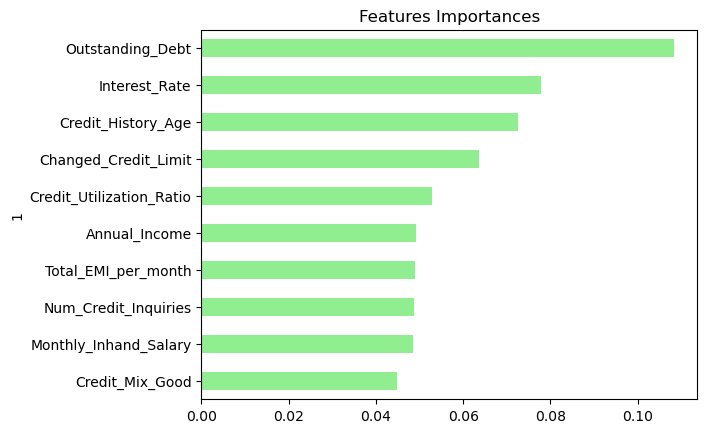

In [97]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)[0:10])
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [99]:
from sklearn.tree import DecisionTreeClassifier

rf_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

rf_model = rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Good", "Actual Poor", "Actual Standard"], columns=["Predicted Good", "Predicted Poor", "Predicted Standard"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Good,Predicted Poor,Predicted Standard
Actual Good,3108,23,1336
Actual Poor,740,4277,2226
Actual Standard,1842,1410,10038


Accuracy Score : 0.69692
Classification Report
              precision    recall  f1-score   support

        Good       0.55      0.70      0.61      4467
        Poor       0.75      0.59      0.66      7243
    Standard       0.74      0.76      0.75     13290

    accuracy                           0.70     25000
   macro avg       0.68      0.68      0.67     25000
weighted avg       0.71      0.70      0.70     25000



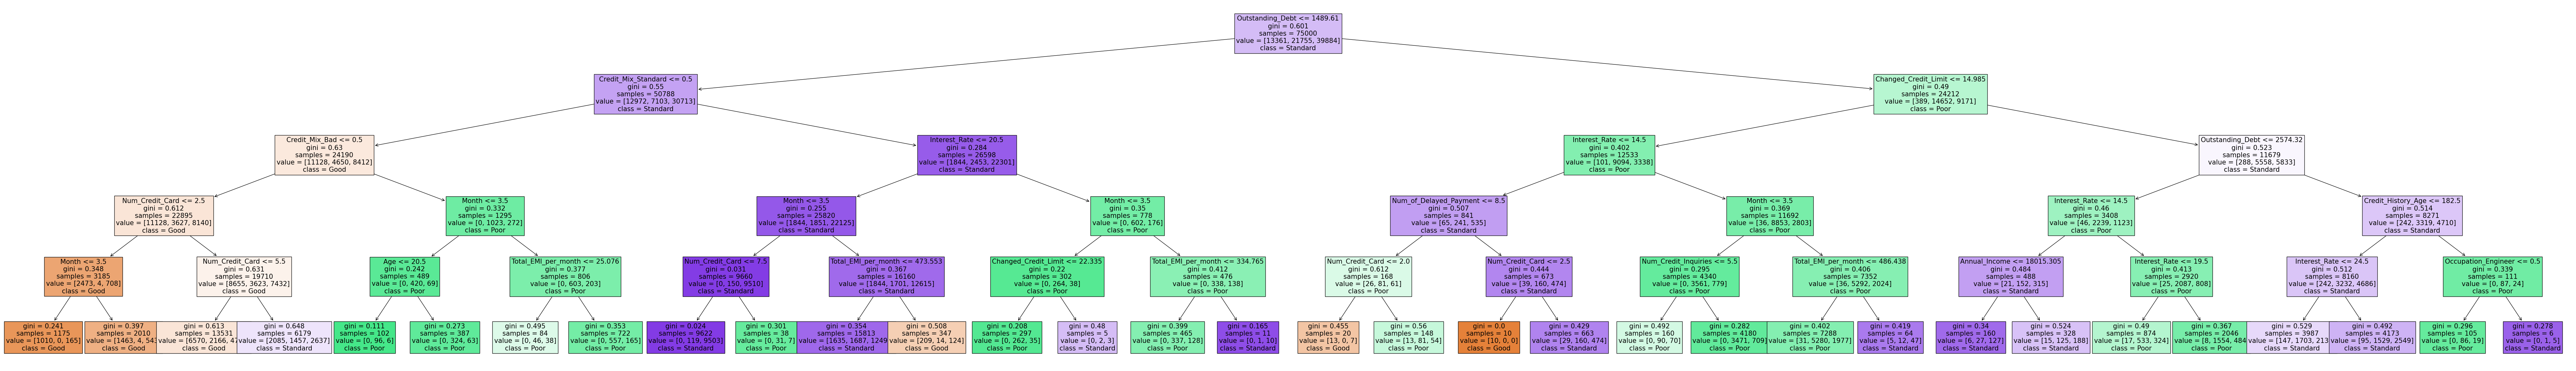

In [101]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(105,15))
tree_model = tree.plot_tree(rf_model,
                   feature_names=X_train.columns.to_list(),
                   class_names=list(rf_model.classes_),
                   filled=True, fontsize=15)

plt.savefig("tree",dpi=300)